In [ ]:
!pip install top2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 35.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp310-cp310-linux_x86_64.whl size=3541462 sha256=7c50ce13a658c1b7b560d72f49495dddf5a680f91a344c43b27ea673b0acac83
  Stored in directory: /root/.cache/pip/wheels/dc/52/e3/6c6b60b126b4d5c4370cb5ac071b82950f91649d62d72f7f56
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=00e94df543089c030eca83fd2df1651914d52d2226480d93ebc65973867592ae
  Stored in di

In [ ]:
from top2vec import Top2Vec
from sklearn.datasets import fetch_20newsgroups

# Fetch the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Create a Top2Vec model
model = Top2Vec(documents=newsgroups.data)

# Get the number of topics
num_topics = model.get_num_topics()

# Get the topics and their top words
topics, word_scores, topic_sizes = model.get_topics(num_topics=num_topics)

# Print the topics and their top words
for topic, size in zip(topics, topic_sizes):
    print(f"Topic Size: {size}")
    print("Top Words:", topic)
    print()


2023-05-24 02:21:12,746 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-05-24 02:21:21,946 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-05-24 02:36:16,026 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-05-24 02:37:02,906 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-05-24 02:37:07,010 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


Topic Size: 0
Top Words: ['god' 'faith' 'jesus' 'christ' 'bible' 'christianity' 'christians'
 'christian' 'scripture' 'heaven' 'scriptures' 'belief' 'truth' 'spirit'
 'revelation' 'eternal' 'gospel' 'life' 'holy' 'believers' 'spiritual'
 'contradict' 'luke' 'divine' 'himself' 'church' 'lord' 'theology' 'sins'
 'judgement' 'accept' 'meaning' 'believe' 'resurrection' 'testament'
 'doctrines' 'corinthians' 'salvation' 'prophets' 'nature' 'evil'
 'doctrine' 'religions' 'romans' 'believing' 'sense' 'therefore'
 'interpretation' 'biblical' 'passages']

Topic Size: 1
Top Words: ['bike' 'car' 'ride' 'honda' 'cars' 'brakes' 'tires' 'rear' 'engine'
 'bikes' 'wheel' 'mph' 'riding' 'gear' 'wheels' 'suspension' 'brake'
 'motorcycle' 'passenger' 'throttle' 'steering' 'tire' 'seat' 'miles'
 'bmw' 'toyota' 'ford' 'driving' 'front' 'valve' 'cylinder' 'torque'
 'shaft' 'clutch' 'parking' 'stock' 'pedal' 'road' 'mileage' 'abs'
 'highway' 'owner' 'rpm' 'fun' 'seats' 'dealer' 'exhaust' 'riders' 'turn'
 'sp

In [ ]:
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

topics_texts = topics

# Create a dictionary and corpus
dictionary = Dictionary(topics_texts)
corpus = [dictionary.doc2bow(topic) for topic in topics_texts]

# Create a CoherenceModel object with the corpus and dictionary
coherence_model = CoherenceModel(
    topics=topics_texts,
    corpus=corpus,
    dictionary=dictionary,
    texts=topics_texts,
    coherence='c_v'  # Specify the coherence measure, e.g., 'c_v', 'u_mass', 'c_uci', 'c_npmi'
)

# Calculate the coherence score
coherence_score = coherence_model.get_coherence()

# Print the topic diversity score
print("Coherence Score:", coherence_score)

Coherence Score: 0.984600803804723


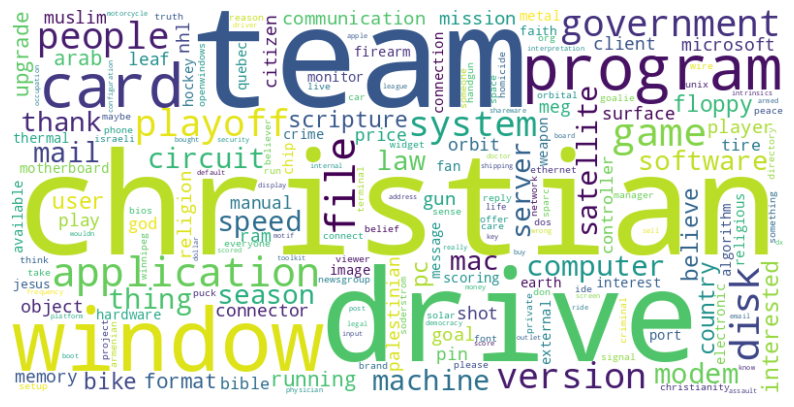

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate the top words from all topics
all_words = ''
for topic in topics:
  for word in topic:
    all_words += word
    all_words += " "

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_samples

# Assuming you have a model object named 'model'

# Get the document vectors
document_vectors = model.document_vectors

# Get the assigned topics for each document
assigned_topics = model.doc_top

# Calculate the silhouette coefficients
silhouette_values = silhouette_samples(document_vectors, assigned_topics)

# Calculate the average silhouette coefficient
average_silhouette_score = silhouette_values.mean()

# Print the average silhouette coefficient
print("Average Silhouette Score:", average_silhouette_score)



Average Silhouette Score: 0.02209169
